In [2]:
from IPython.display import IFrame, Image, display, YouTubeVideo
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns  # Makes for nicer plots
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 5, 4

# Transitions in Space and Time

*Space-Time Analytics — Lecture 7*

* **Prof. Carson J. Q. Farmer**  
    <i class="fa-fw fa fa-twitter"></i> [@carsonfarmer](https://twitter.com/carsonfarmer)  
    <i class="fa-fw fa fa-globe"></i> [carsonfarmer.com](https://carsonfarmer.com)  
    <i class="fa-fw fa fa-envelope-o"></i> [carson.farmer@colorado.edu](mailto:carson.farmer@colorado.edu)  
    <i class="fa-fw fa fa-github-alt"></i> [github.com/carsonfarmer](https://github.com/carsonfarmer)  
    <i class="fa-fw fa fa-briefcase"></i> Guggenheim Building Room 207  
    <i class="fa-fw fa fa-clock-o"></i> Wednesdays 2:00-3:00 PM and 4:15-5:15 PM  

## Today

* This week's student presentations  
    <i class="fa-fw fa fa-search"></i> [Agent-Based/Dynamic Modeling](http://www.sciencedirect.com/science/article/pii/S1364815211002003)  
* Learning stuff...  
    <i class="fa-fw fa fa-clock-o"></i> Markov Models for Modeling Transitions  
* New Lab!  
    <i class="fa-fw fa fa-github"></i> Go through Git/GitHub setup together  
    <i class="fa-fw fa fa-check-square-o"></i> Outline lab requirements and schedule

## Student Presentation

[**Agent-Based/Dynamic Modeling**](http://www.sciencedirect.com/science/article/pii/S1364815211002003)  

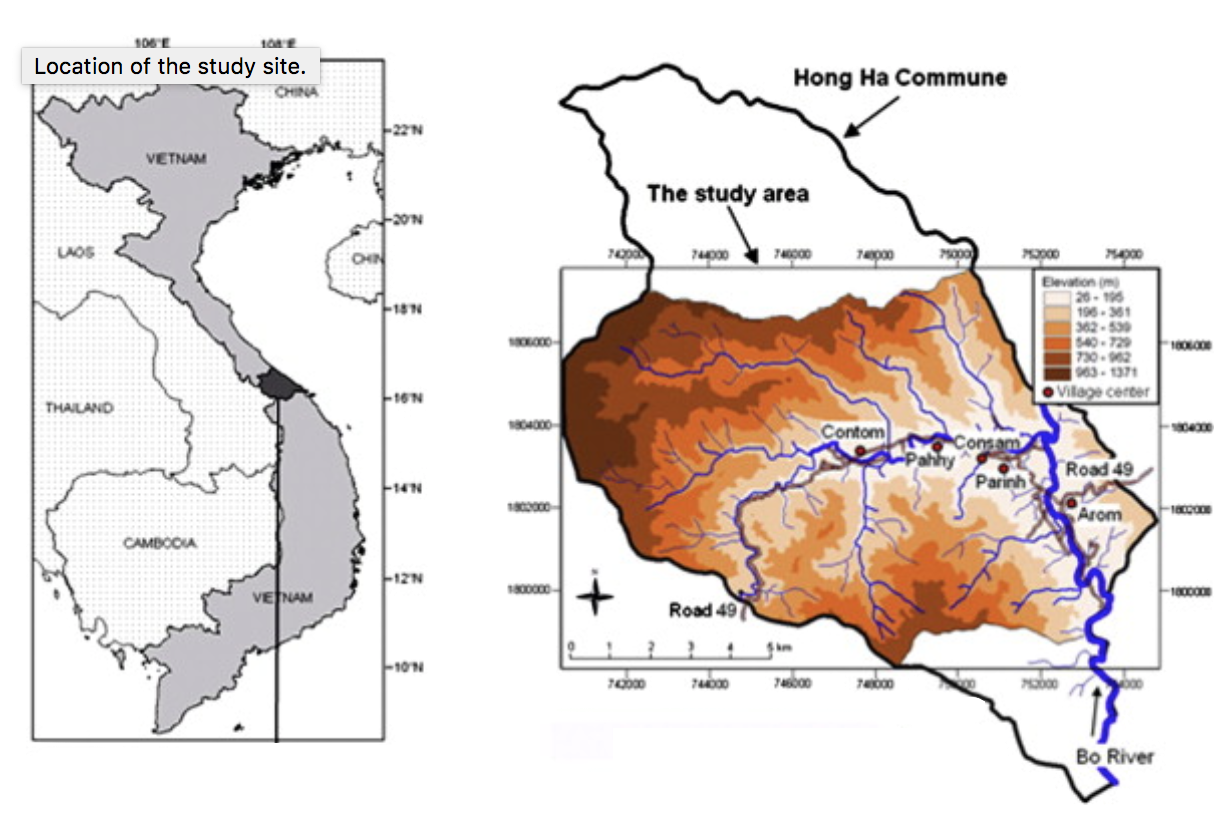

In [4]:
display(Image("./images/presentation5.png", width=500, embed=True))

## Previously, on Space-Time Analytics...

* Tidy Data (an aside)
    * Git/GitHub Tools
    * Melting/Molten Data
    * Time as a Variable
* Space-Time Interactions 
    * Some Formal Tests
    * Some Discussion of Interactions

## Spatial Dynamics

* Focus on analyzing dynamics of *longitudinal* spatial data
    * Observations on *fixed* areal units
    * *Multiple* time periods
* Examples
    * Voting patterns in US Presidential elections
    * Remote sensing images/changes
    * Labor market dynamics
    * Among many others...

## Tools for Spatial Dynamics

* We'll stick with PySAL tools for now...
    * Start with Markov-based methods
    * Transition (😉 get it?) to Rank dynamics
    
<br/>
<div class="alert alert-info", style="font-size: 0.8em;">
Here's a [good reference for this stuff](http://onlinelibrary.wiley.com/doi/10.1111/j.1538-4632.2001.tb00444.x/full)...
</div>

## What Are They Good For?

<a href="https://svs.gsfc.nasa.gov/30009"><img style="float: right; height: 200px" src="https://svs.gsfc.nasa.gov/vis/a030000/a030000/a030009/landsat25years_crop_print.jpg"></img></a>

* Consider a [time series of remote sensing images](https://svs.gsfc.nasa.gov/vis/a030000/a030000/a030009/landsat25years_720p.mp4) used to develop land use classifications
    * States could be defined as specific land use classes
    * Goal then is to model transitions in and out of different classes for each pixel

> Markov chains are a template for the analysis of systems with finitely many states where random transitions between states happen at discrete points in time

## Markov Chains

* Stochastic process that satisfies Markov property
    * Usually characterized as "memorylessness"
* Make future predictions based *solely* on present state "just as well as if knowing full history"
    * i.e., Future and past are independent\*

## States

* May be in 1 of $k$ different states at any point in time
    * States are exhaustive and mutually exclusive
    * *What does that mean?*

$$
\Pr(X_{t+1} = j \mid X_0 = i_0, \dots, X_t = i_t) = P(X_{t+1} = j \mid X_t = i_t)
$$

* Or in words...
    * Probabilities that govern transition from state $x_t$ at time $t$ to state $x$ at time $t+1$ only depend on the state $x_t$ at time $t$ and *not* on the states the process was in before time $t$. 


## Transition Probabilities

* The transition probabilities are 
    * $\Pr(X_{t+1} = j \mid X_t = i)$
* Transition probabilities are called stationary if 
    * $\Pr(X_{t+1} = j \mid X_t = i) = \Pr(X_1 = j \mid X_0 = i)$
* If finite set of states of $X_t$...
    * Then stationary transition probabilities stored in transition matrix:
    * $P_{ij} = \Pr(X_1 = j \mid X_0 = i)$

## Talking About Chains

* Stochastic process with finite number ($n$) states (that has Markov property)
    * Transitions between states in discrete steps ($t$)
* MC is completely characterized by transition probabilities $P_{ij}$
    * $\Pr$ of $i \rightarrow j$ stored in $n \times n$ transition matrix $P$

## More About Chains

* Rows of $P$ sum to 1
    * Such a matrix is called a stochastic matrix
* Initial distribution of states given by initial probability vector $p(0) = \{p_1(0), \dots, p_n(0)\}$
    * Generally interested in change of probability distribution of states over time

## Back to [Markov Chains](http://setosa.io/ev/markov-chains/)

> mathematical systems that hop from one "state" to another...

In [3]:
display(IFrame(src="http://setosa.io/markov/playground.html?1475450174967#%7B%0A%20%20%22tm%22%3A%20%5B%0A%20%20%20%20%5B%0A%20%20%20%20%20%200.3%2C%0A%20%20%20%20%20%200.3%2C%0A%20%20%20%20%20%200.4%0A%20%20%20%20%5D%2C%0A%20%20%20%20%5B%0A%20%20%20%20%20%200.3%2C%0A%20%20%20%20%20%200.5%2C%0A%20%20%20%20%20%200.2%0A%20%20%20%20%5D%2C%0A%20%20%20%20%5B%0A%20%20%20%20%20%200.4%2C%0A%20%20%20%20%20%200.4%2C%0A%20%20%20%20%20%200.2%0A%20%20%20%20%5D%0A%20%20%5D%0A%7D", width=800, height=300))

## Quick Python Example

* Small artificial chain consisting of `3` states (`a`, `b`, `c`) and `5` different 'pixels' at three different points in time:

In [4]:
import pysal as ps
import numpy as np
c = np.array([['b','a','c'],
              ['c','c','a'],
              ['c','b','c'],
              ['a','a','b'],
              ['a','b','c']])
c

array([['b', 'a', 'c'],
       ['c', 'c', 'a'],
       ['c', 'b', 'c'],
       ['a', 'a', 'b'],
       ['a', 'b', 'c']], 
      dtype='<U1')

* First pixel was in class 'b' in period 1, class 'a' in period 2,
and class 'c' in period 3
* Can summarize the overall transition dynamics for set of pixels by treating it as Markov chain:

In [5]:
m = ps.Markov(c)
m.classes

array(['a', 'b', 'c'], 
      dtype='<U1')

* Assumption is that *observations* are on rows and different *points in time* on columns

## Transitions

* Markov instance will also have a transitions matrix
* Of four pixels that began in class 'a'...
    * 1 remained in that class, 2 transitioned to class 'b' and 1 transitioned to class 'c'

In [6]:
m.transitions

array([[ 1.,  2.,  1.],
       [ 1.,  0.,  2.],
       [ 1.,  1.,  1.]])

## Real-World Example

* Overly simple example...
* How about something more realistic?
    * [Understanding regional income dynamics in the US](http://joeg.oxfordjournals.org/content/5/2/155.short)
* Load data on per capita income observed annually from 1929 to 2010 for the lower 48 US states

In [7]:
df = pd.read_csv(ps.examples.get_path("usjoin.csv"))
df.head()

,Name,STATE_FIPS,1929,1930,1931,1932,1933,1934,1935,1936,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Alabama,1,323,267,224,162,166,211,217,251,...,23471,24467,25161,26065,27665,29097,30634,31988,32819,32274
1,Arizona,4,600,520,429,321,308,362,416,462,...,25578,26232,26469,27106,28753,30671,32552,33470,33445,32077
2,Arkansas,5,310,228,215,157,157,187,207,247,...,22257,23532,23929,25074,26465,27512,29041,31070,31800,31493
3,California,6,991,887,749,580,546,603,660,771,...,32275,32750,32900,33801,35663,37463,40169,41943,42377,40902
4,Colorado,8,634,578,471,354,353,368,444,542,...,32949,34228,33963,34092,35543,37388,39662,41165,41719,40093


* We can slice and subset the data to get it in the format we want...

In [8]:
pci = df.ix[:, "1929":].T  # The 'T' means transpose...
pci.shape

(81, 48)

* The first row of the above array is the per capita income for the first year:

In [9]:
pci.ix[0, :].values  # 'Values' means just get the raw array

array([ 323,  600,  310,  991,  634, 1024, 1032,  518,  347,  507,  948,
        607,  581,  532,  393,  414,  601,  768,  906,  790,  599,  286,
        621,  592,  596,  868,  686,  918,  410, 1152,  332,  382,  771,
        455,  668,  772,  874,  271,  426,  378,  479,  551,  634,  434,
        741,  460,  673,  675])

## Discretizing

* Classic Markov approaches require discrete states
    * Discretize *distribution* by defining classes
    * We will use the [quintiles](https://en.wikipedia.org/wiki/Household_income_in_the_United_States#Quintiles) for each annual income distribution

In [10]:
q5 = np.array([ps.Quantiles(y).yb for y in pci.values]).T
q5.shape
q5[:, 0]

array([0, 2, 0, 4, 2, 4, 4, 1, 0, 1, 4, 2, 2, 1, 0, 1, 2, 3, 4, 4, 2, 0, 2,
       2, 2, 4, 3, 4, 0, 4, 0, 0, 3, 1, 3, 3, 4, 0, 1, 0, 1, 2, 2, 1, 3, 1,
       3, 3])

## First Year

* Alabama (with an income of 323) fell in the 1st quintile in 1929
* Wyoming (with an income of 675) fell in the 4th quintile in 1929
* Is there a nicer way to 'view' this? Maybe we could *tidy* the data?

In [11]:
tidy = pd.melt(df, id_vars=["Name", "STATE_FIPS"],
               var_name="Year", value_name="Income")
tidy.head()

,Name,STATE_FIPS,Year,Income
0,Alabama,1,1929,323
1,Arizona,4,1929,600
2,Arkansas,5,1929,310
3,California,6,1929,991
4,Colorado,8,1929,634


* We can now add the 'flat' quintile groups to the tidy data frame

In [12]:
# Add 1 because its easy to talk about it that way
tidy["Group"] = q5.T.flatten() + 1
tidy.head()

,Name,STATE_FIPS,Year,Income,Group
0,Alabama,1,1929,323,1
1,Arizona,4,1929,600,3
2,Arkansas,5,1929,310,1
3,California,6,1929,991,5
4,Colorado,8,1929,634,3


## Time Series'

* Now we have a time series for each state of its quintile membership
    * We can also compare this with the observed income values
    * For example, Colorado has occupied the 3rd, 4th and 5th quintiles at different points in time:

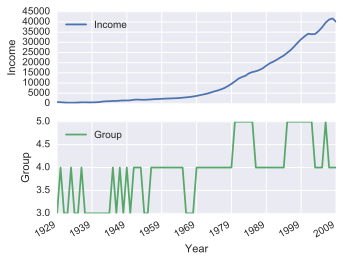

In [13]:
co = tidy[tidy.Name == "Colorado"].set_index("Year")
ax1, ax2 = co[["Income", "Group"]].plot(subplots=True)
ax1.set_ylabel("Income")
ax2.set_ylabel("Group")
plt.show()

## Markov Objects

* To summarize the transition dynamics for all units, we instantiate a Markov object:

In [14]:
m5 = ps.Markov(q5)
m5.transitions

array([[ 729.,   71.,    1.,    0.,    0.],
       [  72.,  567.,   80.,    3.,    0.],
       [   0.,   81.,  631.,   86.,    2.],
       [   0.,    3.,   86.,  573.,   56.],
       [   0.,    0.,    1.,   57.,  741.]])

## First Order Markov

* Assuming we can treat these transitions as a [first order Markov chain](https://en.wikipedia.org/wiki/Markov_chain#Discrete-time_Markov_chain) (i.e., $\Pr(X_{t+1} = j \mid X_{t} = i_{t})$ like before), we can estimate the transition probabilities:



In [15]:
m5.p

matrix([[ 0.91011236,  0.0886392 ,  0.00124844,  0.        ,  0.        ],
        [ 0.09972299,  0.78531856,  0.11080332,  0.00415512,  0.        ],
        [ 0.        ,  0.10125   ,  0.78875   ,  0.1075    ,  0.0025    ],
        [ 0.        ,  0.00417827,  0.11977716,  0.79805014,  0.07799443],
        [ 0.        ,  0.        ,  0.00125156,  0.07133917,  0.92740926]])

* We can also look at the long run [steady state distribution](#Videos-on-Markov-Chains):

In [16]:
m5.steady_state

matrix([[ 0.20774716],
        [ 0.18725774],
        [ 0.20740537],
        [ 0.18821787],
        [ 0.20937187]])

## Transition Times

* Number of transitions $k$ until process hits state $j$ if it starts at state $i$
    * First passage time (FPT) is RV  
    * Define $f_{ij}(k) = \Pr$ that FP from $i$ to $j$ occurs after $k$ transitions
    * Not going to cover this here... [Google it](https://www.google.com/search?q=how+to+compute+first+passage+time+markov+chain)!


## Estimate FPT

* With the transition probability matrix in hand, we can estimate the first mean passage time:

In [17]:
ps.ergodic.fmpt(m5.p).round(4)  # Round for nicer formatting

array([[   4.8135,   11.5029,   29.6092,   53.3859,  103.5982],
       [  42.0477,    5.3402,   18.7446,   42.5002,   92.7132],
       [  69.2585,   27.2108,    4.8215,   25.2718,   75.4331],
       [  84.9069,   42.8591,   17.1808,    5.313 ,   51.6095],
       [  98.413 ,   56.3652,   30.6605,   14.2116,    4.7762]])

## What Does That Mean?

* For a state with income in the 1st quintile...
    * Takes on average `11.5` years for it to first enter the 2nd quintile
    * 29.6 to get to the 3rd quintile
    * 53.4 years to enter the 4th, and 
    * 103.6 years to reach richest quintile

## Not Very Spatial

* This is actually quite useful already... but not very spatial!
* So far, treated all spatial units as *independent* to estimate transition $\Pr$
    * This hides a number of implicit assumptions...

1. Transition dynamics assumed to hold *for all units*,
2. and for *all time periods*
3. *Interactions* between transitions of individual units are ignored


* Maybe *regional context* is important for understanding *regional income* dynamics
    * Classic Markov approach provides no evidence for this

## Adding Spatial Component

* We require a spatial weights object, same as usual...
    * For demo, we grab an existing GAL file:

In [18]:
w = ps.open(ps.examples.get_path("states48.gal")).read()
w.transform = 'r'  # What does this do?

## Adjusting Temporal Component

* We require data on past transitions
    * Use same data as before...
    * Transform income series to *relative* incomes (standardize each period by mean):
        * Why?

In [19]:
subset = df.ix[:, "1929":]  # Grab all the 'year' columns
rpci = subset / subset.mean(axis=0)
rpci.head()  # Is this tidy data?

,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,0.525025,0.490809,0.490802,0.463519,0.506162,0.558263,0.504382,0.517548,0.515817,0.509483,...,0.832717,0.837863,0.850126,0.855097,0.864166,0.871194,0.863026,0.861483,0.862523,0.867464
1,0.975279,0.955882,0.939974,0.918455,0.939144,0.957778,0.966927,0.952618,0.973678,0.998086,...,0.907470,0.898305,0.894320,0.889248,0.898152,0.918321,0.917061,0.901395,0.878975,0.862169
2,0.503894,0.419118,0.471082,0.449213,0.478719,0.494764,0.481139,0.509300,0.494567,0.482339,...,0.789646,0.805844,0.808500,0.822586,0.826682,0.823737,0.818148,0.836760,0.835742,0.846472
3,1.610836,1.630515,1.641119,1.659514,1.664846,1.595414,1.534066,1.589759,1.535861,1.609883,...,1.145069,1.121511,1.111607,1.108886,1.113998,1.121680,1.131648,1.129585,1.113718,1.099368
4,1.030545,1.062500,1.031999,1.012876,1.076356,0.973652,1.032008,1.117574,1.027771,1.056551,...,1.168982,1.172125,1.147523,1.118433,1.110250,1.119435,1.117365,1.108632,1.096425,1.077623


## Spatial Markov

* We use 5 states for the chain (same as before)

In [20]:
sm = ps.Spatial_Markov(rpci.values, w, fixed=True, k=5)

* Data are 'pooled' over space and time and here quintiles calculated for pooled data
    * This is why we first transformed data to *relative* incomes

## Global Transitions

* Global transition probability matrix for relative incomes:

In [21]:
sm.p

matrix([[ 0.91461837,  0.07503234,  0.00905563,  0.00129366,  0.        ],
        [ 0.06570302,  0.82654402,  0.10512484,  0.00131406,  0.00131406],
        [ 0.00520833,  0.10286458,  0.79427083,  0.09505208,  0.00260417],
        [ 0.        ,  0.00913838,  0.09399478,  0.84856397,  0.04830287],
        [ 0.        ,  0.        ,  0.        ,  0.06217617,  0.93782383]])

## Getting Spatial

* Compare *global* transition dynamics to those conditioned on regional context!
    * Transition dynamics split across economies who have spatial lags in different quintiles at start of each year
* We have 5 classes, so 5 different conditioned transition probability matrices are estimated, each with 5 rows and columns

In [22]:
# 5 x 5 x 5 matrix...
for p in sm.P:
    print(p)

[[ 0.96341463  0.0304878   0.00609756  0.          0.        ]
 [ 0.06040268  0.83221477  0.10738255  0.          0.        ]
 [ 0.          0.14        0.74        0.12        0.        ]
 [ 0.          0.03571429  0.32142857  0.57142857  0.07142857]
 [ 0.          0.          0.          0.16666667  0.83333333]]
[[ 0.79831933  0.16806723  0.03361345  0.          0.        ]
 [ 0.0754717   0.88207547  0.04245283  0.          0.        ]
 [ 0.00537634  0.06989247  0.8655914   0.05913978  0.        ]
 [ 0.          0.          0.06372549  0.90196078  0.03431373]
 [ 0.          0.          0.          0.19444444  0.80555556]]
[[ 0.84693878  0.15306122  0.          0.          0.        ]
 [ 0.08133971  0.78947368  0.1291866   0.          0.        ]
 [ 0.00518135  0.0984456   0.79274611  0.0984456   0.00518135]
 [ 0.          0.          0.09411765  0.87058824  0.03529412]
 [ 0.          0.          0.          0.10204082  0.89795918]]
[[ 0.8852459   0.09836066  0.          0.01639344  0

## What The %^&*#* Does That Mean?

* Probability of 'poor' state remaining poor is...
    * 0.963 if neighbors are in 1st quintile
    * 0.798 if neighbors are in 2nd quintile
* Probability of a rich economy remaining rich is...
    * 0.977 if neighbors are in 5th quintile, but...
    * if neighbors are in 4th quintile this $\downarrow$ to 0.903.

## Spatially-Explicit Transitions

* We have a similar output when looking at first mean passage times:

In [23]:
for f in sm.F:
    print(f)

[[   2.29835259   28.95614035   46.14285714   80.80952381  279.42857143]
 [  33.86549708    3.79459555   22.57142857   57.23809524  255.85714286]
 [  43.60233918    9.73684211    4.91085714   34.66666667  233.28571429]
 [  46.62865497   12.76315789    6.25714286   14.61564626  198.61904762]
 [  52.62865497   18.76315789   12.25714286    6.           34.1031746 ]]
[[   7.46754205    9.70574606   25.76785714   74.53116883  194.23446197]
 [  27.76691978    2.94175577   24.97142857   73.73474026  193.4380334 ]
 [  53.57477715   28.48447637    3.97566318   48.76331169  168.46660482]
 [  72.03631562   46.94601483   18.46153846    4.28393653  119.70329314]
 [  77.17917276   52.08887197   23.6043956     5.14285714   24.27564033]]
[[   8.24751154    6.53333333   18.38765432   40.70864198  112.76732026]
 [  47.35040872    4.73094099   11.85432099   34.17530864  106.23398693]
 [  69.42288828   24.76666667    3.794921     22.32098765   94.37966594]
 [  83.72288828   39.06666667   14.3           3.

## Explosion of Information

* States with incomes in the first quintile with neighbors in...
    * 1st quintile return to the 1st quintile after 2.298 years
    * Enter 4th quintile 80.810 years after leaving 1st quintile

## More Information

* Poor states with neighbors in 4th quintile...
    * Return to 1st first quintile (on average) after 12.88 years
    * Would enter 4th quintile after 28.473 years

![That's all folks](http://media3.giphy.com/media/jYAGkoghdmD9S/giphy.gif)

## Videos on Markov Chains

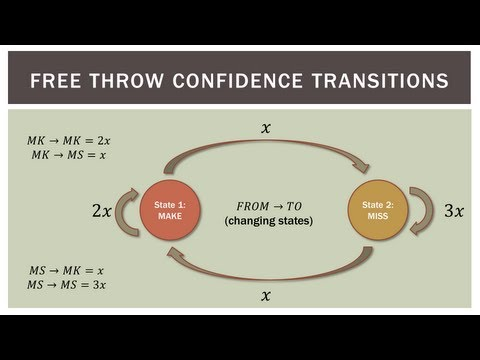

In [24]:
YouTubeVideo("tYaW-1kzTZI")  # YouTube Video about Markov Chains

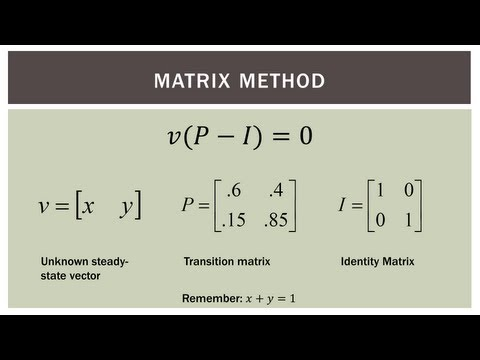

In [25]:
YouTubeVideo("cP3c2PJ4UHg")  # YouTube Video about Markov Steady-States